In [1]:
# === Built-in Libraries ===
import os
import random
from pathlib import Path
from collections import Counter

# === Core Data & Visualization ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Machine Learning & Preprocessing ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score
)

# === TensorFlow / Keras ===
import tensorflow as tf
from tensorflow.keras import Sequential, Model, layers, callbacks
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout,
    GlobalMaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,
    CSVLogger, LearningRateScheduler
)
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.applications import (
    VGG16, ResNet152V2, InceptionResNetV2,
    EfficientNetB3, MobileNetV2, InceptionV3
)
from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
from keras import backend as K

# === Reproducibility ===
from numpy.random import seed
seed(42)
random.seed(42)
tf.random.set_seed(42)

# **تقسيم ملف الصور**

بنرجع له بعدين

In [2]:
'''import splitfolders  

input_dir = "data/ASLAD-190K/ASLAD-96K/ASLAD-96K/ASLAD-3000"


splitfolders.ratio(input_dir, output="data_splitted", seed=1345, ratio=(.8, .1, .1))'''

'import splitfolders  \n\ninput_dir = "data/ASLAD-190K/ASLAD-96K/ASLAD-96K/ASLAD-3000"\n\n\nsplitfolders.ratio(input_dir, output="data_splitted", seed=1345, ratio=(.8, .1, .1))'

# **أستدعاء ملف اللاند ماركز**

In [3]:
df_landMarks=pd.read_csv("data/ASLAD-190K/ASLAD-96K/ASLAD-96K_63Hand landmarks26AnglesLabelImgName.csv")
df_landMarks.head()


4096      4097  4098      4099      4100      4101      4102      4103  \
0  0.145522  0.643617   0.0  0.216418  0.462766  0.033582  0.320896  0.388298   
1  0.178571  0.676724   0.0  0.195055  0.435345 -0.013736  0.299451  0.293103   
2  0.148615  0.524229   0.0  0.234257  0.286344  0.005038  0.385390  0.215859   
3  0.209125  0.709845   0.0  0.216730  0.518135 -0.011407  0.300380  0.388601   
4  0.201493  0.655556   0.0  0.238806  0.450000  0.000000  0.335821  0.322222   

       4104      4105  ...        4177        4178       4179       4180  \
0  0.029851  0.425373  ...  170.380848  178.725028  54.326649  37.711551   
1 -0.038462  0.420330  ...  172.830853  174.446395  43.945272   7.337006   
2 -0.022670  0.501259  ...  173.483885  166.959216  33.006817  76.476711   
3 -0.034221  0.414449  ...  173.900445  177.199497  30.874348  25.858668   
4 -0.018657  0.444030  ...  173.873818  179.370787  43.721600  15.400659   

        4181        4182       4183        4184  4190            4191  
0  93.682500  167.188984  62.729871  169.750060     0  ain (5191).jpg  
1  61.554005  175.091288  34.083200  161.236011     0  ain (3810).jpg  
2  53.235687  149.361368  96.177969  128.735581     0  ain (4916).jpg  
3  47.476329  162.969491  52.228580  147.107915     0  ain (3471).jpg  
4  60.668933  170.173443  49.924578  155.005028     0  ain (4095).jpg  

[5 rows x 91 columns]

# **استعراض للملف وقراءته**

In [4]:
print('Shape: ',df_landMarks.shape)
print(df_landMarks.info())

Shape:  (96000, 91)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4096    96000 non-null  float64
 1   4097    96000 non-null  float64
 2   4098    96000 non-null  float64
 3   4099    96000 non-null  float64
 4   4100    96000 non-null  float64
 5   4101    96000 non-null  float64
 6   4102    96000 non-null  float64
 7   4103    96000 non-null  float64
 8   4104    96000 non-null  float64
 9   4105    96000 non-null  float64
 10  4106    96000 non-null  float64
 11  4107    96000 non-null  float64
 12  4108    96000 non-null  float64
 13  4109    96000 non-null  float64
 14  4110    96000 non-null  float64
 15  4111    96000 non-null  float64
 16  4112    96000 non-null  float64
 17  4113    96000 non-null  float64
 18  4114    96000 non-null  float64
 19  4115    96000 non-null  float64
 20  4116    96000 non-null  float64
 21  4117    96000 n

In [5]:
feature_cols = [c for c in df_landMarks.columns if c not in ["4190", "4191"]]
X = df_landMarks[feature_cols]
y = df_landMarks["4190"] 


In [6]:
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.5, random_state=42, stratify=y_tmp
)

In [7]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train).astype("float32")
X_val_sc   = scaler.transform(X_val).astype("float32")
X_test_sc  = scaler.transform(X_test).astype("float32")


# **بناء MLP**

In [8]:
tf.random.set_seed(42)
num_features = X_train_sc.shape[1]
num_classes  = 32

mlp_model = Sequential([
    layers.Input(shape=(num_features,)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax'),
])

mlp_model.compile(optimizer=Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mlp_cbs = [
    callbacks.ModelCheckpoint(
        filepath="asl_landmarks.weights.h5",
        save_weights_only=True, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1),
    callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True, verbose=1),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=2),
]

history = mlp_model.fit(
    X_train_sc, y_train,
    validation_data=(X_val_sc, y_val),
    epochs=50, batch_size=128,
    callbacks=mlp_cbs, verbose=2
)

mlp_model.load_weights("asl_landmarks.weights.h5")


Epoch 1/50

Epoch 1: val_accuracy improved from None to 0.97885, saving model to asl_landmarks.weights.h5
600/600 - 8s - 13ms/step - accuracy: 0.7888 - loss: 0.7311 - val_accuracy: 0.9789 - val_loss: 0.0795 - learning_rate: 0.0010
Epoch 2/50

Epoch 2: val_accuracy improved from 0.97885 to 0.98104, saving model to asl_landmarks.weights.h5
600/600 - 6s - 9ms/step - accuracy: 0.9271 - loss: 0.2590 - val_accuracy: 0.9810 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 3/50

Epoch 3: val_accuracy improved from 0.98104 to 0.98208, saving model to asl_landmarks.weights.h5
600/600 - 6s - 11ms/step - accuracy: 0.9385 - loss: 0.2381 - val_accuracy: 0.9821 - val_loss: 0.0692 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.98208
600/600 - 6s - 10ms/step - accuracy: 0.9446 - loss: 0.2297 - val_accuracy: 0.9764 - val_loss: 0.0873 - learning_rate: 0.0010
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.98208
600/600 - 5s - 9ms/step - accuracy: 0.9469 - loss: 

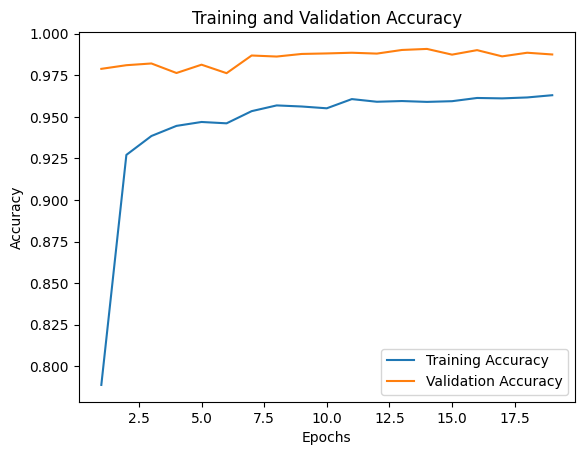

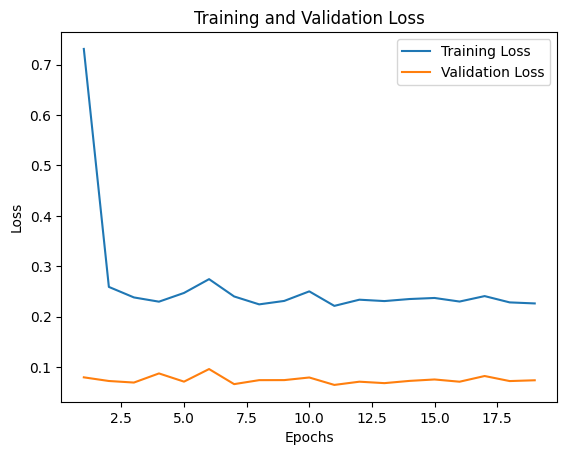

In [9]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(1,len(acc)+1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = mlp_model.evaluate(X_test_sc, y_test, batch_size=256, verbose=0)
print({"test_loss": test_loss, "test_acc": test_acc})



{'test_loss': 0.06766624003648758, 'test_acc': 0.9905208349227905}


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      0.99      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       0.99      1.00      1.00       300
           6       0.99      1.00      1.00       300
           7       1.00      0.99      0.99       300
           8       1.00      1.00      1.00       300
           9       0.99      0.99      0.99       300
          10       1.00      1.00      1.00       300
          11       0.89      0.90      0.90       300
          12       1.00      1.00      1.00       300
          13       1.00      1.00      1.00       300
          14       0.99      0.99      0.99       300
          15       0.99      1.00      1.00       300
          16       1.00      1.00      1

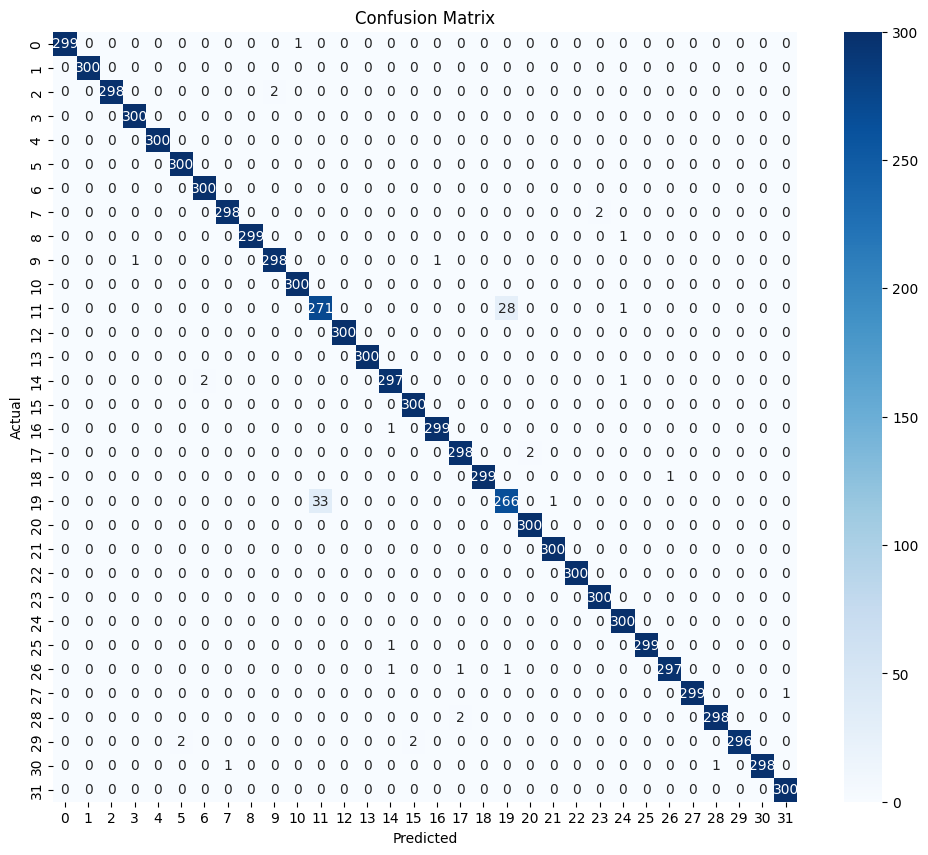

In [11]:
y_pred = mlp_model.predict(X_test_sc)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [12]:
del mlp_model; K.clear_session()

In [13]:

image_size = (299, 299)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data_splitted/train",   
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data_splitted/val",
    seed=333,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data_splitted/test",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 76800 files belonging to 32 classes.
Found 9600 files belonging to 32 classes.
Found 9600 files belonging to 32 classes.


In [14]:
y_true=np.concatenate([y for x, y in test_ds], axis=0)

2025-09-28 20:37:17.309431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']
32


2025-09-28 20:37:25.368148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 20:37:26.481221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 20:37:27.660142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


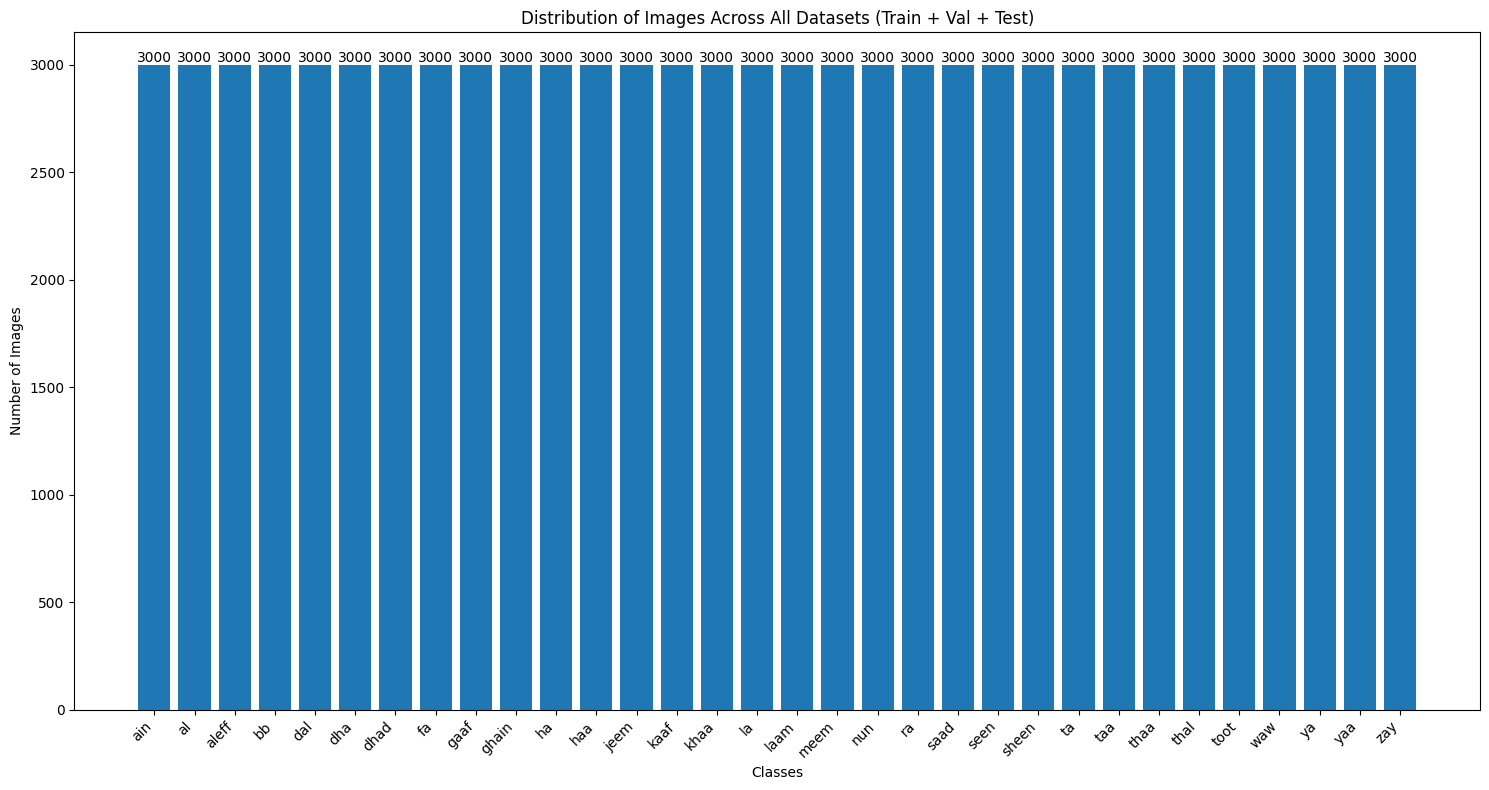

In [16]:
def collect_labels(ds):
    labs = []
    for _, y in ds:
        labs.append(y.numpy())
    return np.concatenate(labs, axis=0)

train_labels = collect_labels(train_ds)
val_labels   = collect_labels(val_ds)
test_labels  = collect_labels(test_ds)

from collections import Counter
label_counts = Counter(train_labels) + Counter(val_labels) + Counter(test_labels)
labels = [class_names[i] for i in range(len(class_names))]
counts = [label_counts[i] for i in range(len(class_names))]

plt.figure(figsize=(15, 8))
bars = plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Classes'); plt.ylabel('Number of Images')
plt.title('Distribution of Images Across All Datasets (Train + Val + Test)')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h, f'{int(h)}', ha='center', va='bottom')
plt.tight_layout(); plt.show()

In [17]:
IMG_IND=299
INPUT_SHAPE=(IMG_IND, IMG_IND, 3)
IMG_SIZE=(IMG_IND, IMG_IND)
BATCH_SIZE=32

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)



In [18]:
def get_callbacks(model_name):
    return [
        ModelCheckpoint(
            filepath=f"model.{model_name}.keras",
            monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
        ),
        EarlyStopping(
            monitor="val_loss", patience=2, restore_best_weights=True, mode="min"
        ),
        ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=2
        )
    ]


In [19]:
data_augmentation = tf.keras.Sequential([

    tf.keras.layers.RandomFlip("horizontal"),          
    tf.keras.layers.RandomRotation(0.08),              
    tf.keras.layers.RandomTranslation(0.06, 0.06),     
    tf.keras.layers.RandomZoom(0.10),                  

    tf.keras.layers.RandomContrast(0.08),              
    tf.keras.layers.RandomBrightness(factor=0.06),     

    tf.keras.layers.GaussianNoise(0.01),               

    
    tf.keras.layers.RandomCrop(290, 290),           
    tf.keras.layers.Resizing(299, 299),
], name="data_augmentation")

# **Base Model:InceptionV3**

In [20]:
tf.keras.backend.clear_session()

OPTIMIZER = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=INPUT_SHAPE)
base_model.trainable = False 

inputs = tf.keras.Input(shape=INPUT_SHAPE, dtype=tf.float32)

x = data_augmentation(inputs)

x = layers.Rescaling(1./127.5, offset=-1.0, name="rescale_m1_1")(x)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="gap")(x)
x = layers.Dense(512, activation="relu", name="fc")(x)
x = layers.Dropout(0.5, name="drop")(x)
outputs = layers.Dense(num_classes, activation="softmax", name="logits")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=OPTIMIZER, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescale_m1_1 (Rescaling)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop (Dropout)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logits (Dense)                  │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,868,288 (87.24 MB)

 Trainable params: 1,065,504 (4.06 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [21]:
history_stage1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6,
    callbacks=get_callbacks("InceptionV3_stage1")
)


Epoch 1/6
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.4943 - loss: 2.9773
Epoch 1: val_accuracy improved from None to 0.95906, saving model to model.InceptionV3_stage1.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1303s 541ms/step - accuracy: 0.6824 - loss: 1.5942 - val_accuracy: 0.9591 - val_loss: 0.1329 - learning_rate: 0.0010
Epoch 2/6
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8531 - loss: 0.6056
Epoch 2: val_accuracy improved from 0.95906 to 0.96104, saving model to model.InceptionV3_stage1.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2848s 1s/step - accuracy: 0.8605 - loss: 0.5933 - val_accuracy: 0.9610 - val_loss: 0.1340 - learning_rate: 0.0010
Epoch 3/6
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.8788 - loss: 0.5793
Epoch 3: val_accuracy improved from 0.96104 to 0.97344, saving model to model.InceptionV3_stage1.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1664s 693ms/step - accuracy: 0.8834 - loss: 0.5681 - val_accuracy: 0.9734 - val_loss: 0.0923 - learning_ra

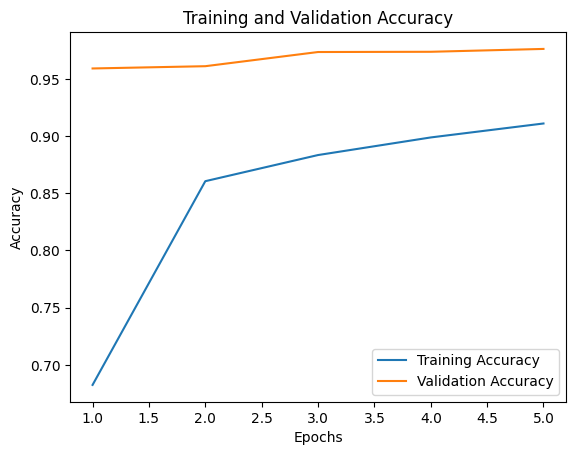

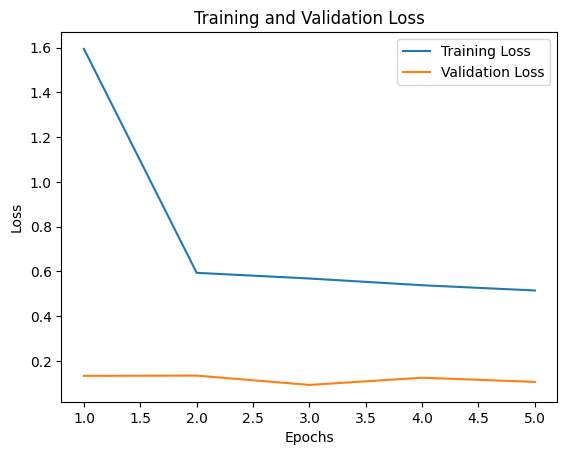

In [22]:
acc=history_stage1.history['accuracy']
val_acc=history_stage1.history['val_accuracy']
loss=history_stage1.history['loss']
val_loss=history_stage1.history['val_loss']
epochs_range=range(1,len(acc)+1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:

model = tf.keras.models.load_model("model.InceptionV3_stage1.keras")

y_pred=model.predict(test_ds)
predict_categories=np.argmax(y_pred, axis=1)
true_categories= y_true
print(classification_report(true_categories, predict_categories, target_names=class_names))


300/300 ━━━━━━━━━━━━━━━━━━━━ 156s 515ms/step
              precision    recall  f1-score   support

         ain       1.00      0.93      0.97       300
          al       0.88      1.00      0.94       300
       aleff       1.00      1.00      1.00       300
          bb       0.99      0.99      0.99       300
         dal       1.00      1.00      1.00       300
         dha       0.98      0.99      0.99       300
        dhad       0.98      0.99      0.99       300
          fa       0.98      0.99      0.98       300
        gaaf       0.97      0.94      0.96       300
       ghain       0.95      0.99      0.97       300
          ha       0.99      1.00      1.00       300
         haa       0.99      0.98      0.98       300
        jeem       0.98      0.99      0.99       300
        kaaf       0.93      0.96      0.94       300
        khaa       0.99      1.00      1.00       300
          la       0.99      0.94      0.96       300
        laam       0.98      0.99   

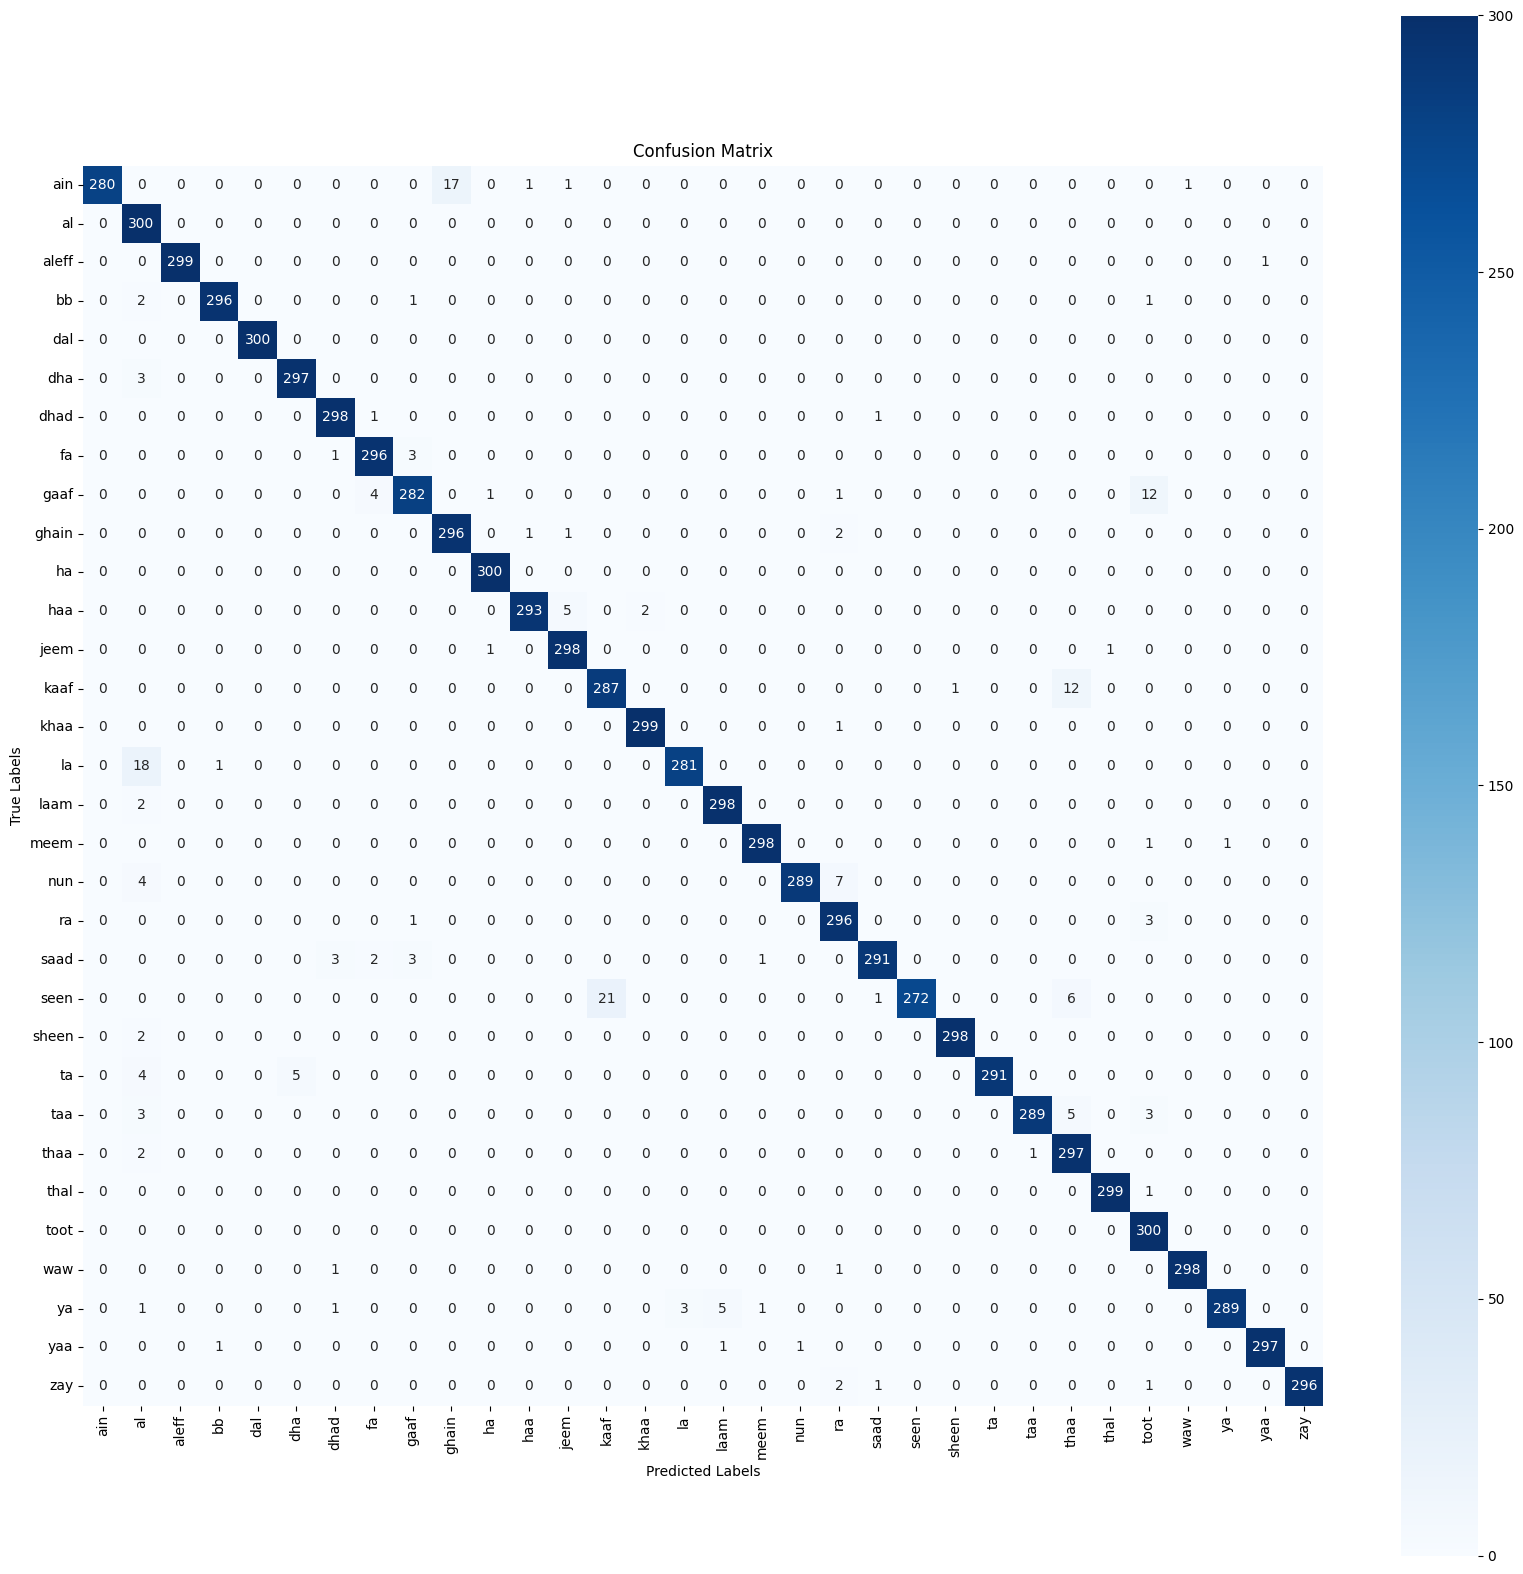

In [24]:
cm=confusion_matrix(y_true, predict_categories, labels=range(len(class_names)))

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,cbar=True,square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


300/300 ━━━━━━━━━━━━━━━━━━━━ 154s 515ms/step


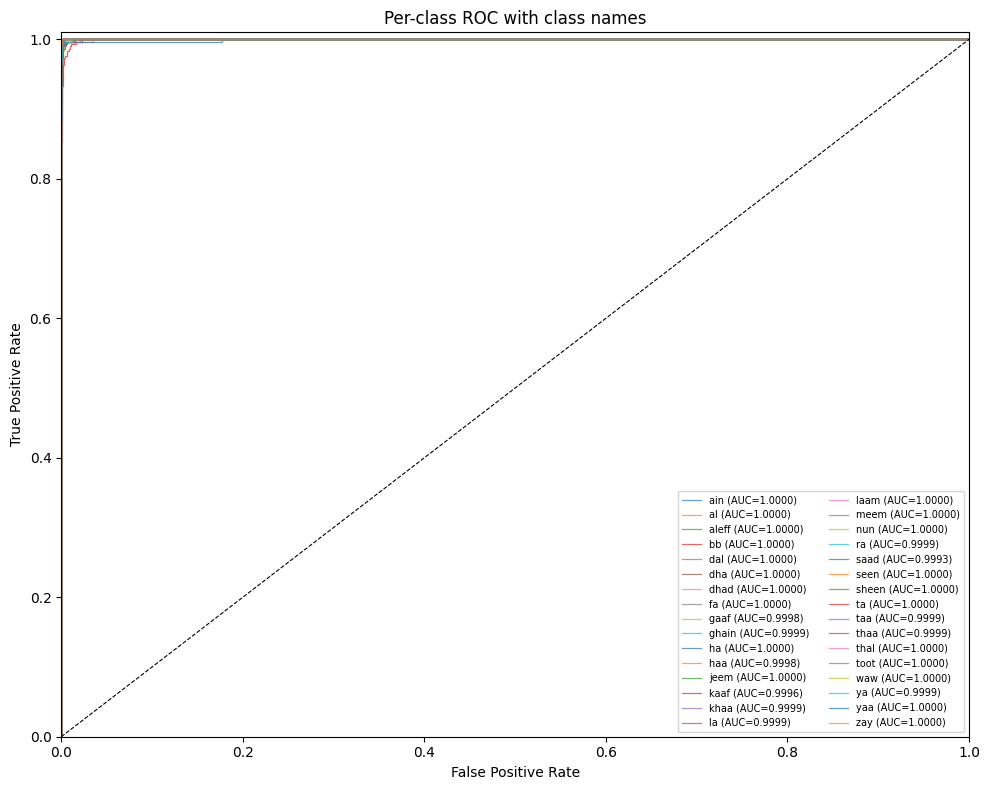

In [25]:

y_score = model.predict(test_ds, verbose=1)           
num_classes = y_score.shape[1]

Y = label_binarize(y_true, classes=np.arange(num_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=0.9, alpha=0.7,
             label=f'{class_names[i]} (AUC={roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlim([0, 1]); plt.ylim([0, 1.01])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Per-class ROC with class names')
plt.legend(loc='lower right', fontsize=7, ncol=2)
plt.tight_layout(); plt.show()


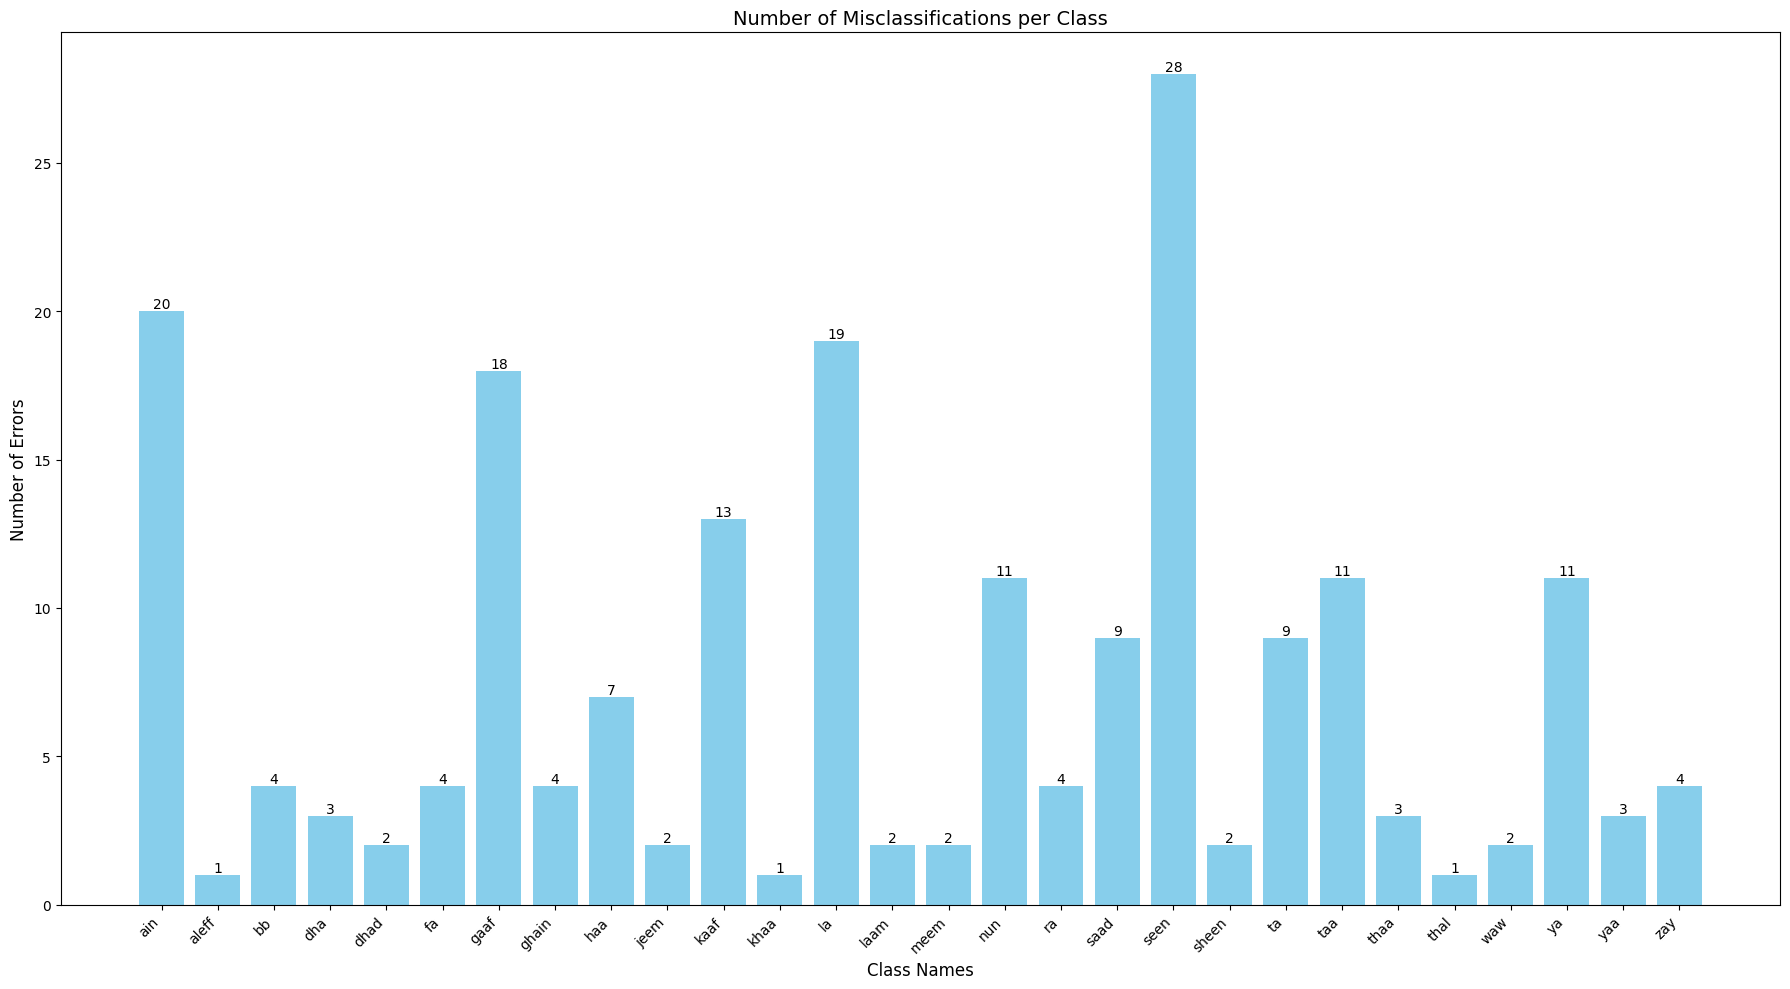

In [26]:

# Identify misclassified samples
misclassified_indices = np.where(y_true != predict_categories)[0]
misclassified_true = y_true[misclassified_indices]

# Count the number of misclassifications per class
misclassified_counts = Counter(misclassified_true)

classes = [class_names[cls] for cls in misclassified_counts.keys()]
errors = list(misclassified_counts.values())

plt.figure(figsize=(18, 10))
bars = plt.bar(classes, errors, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Number of Errors', fontsize=12)
plt.title('Number of Misclassifications per Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


2025-09-28 23:20:56.281369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


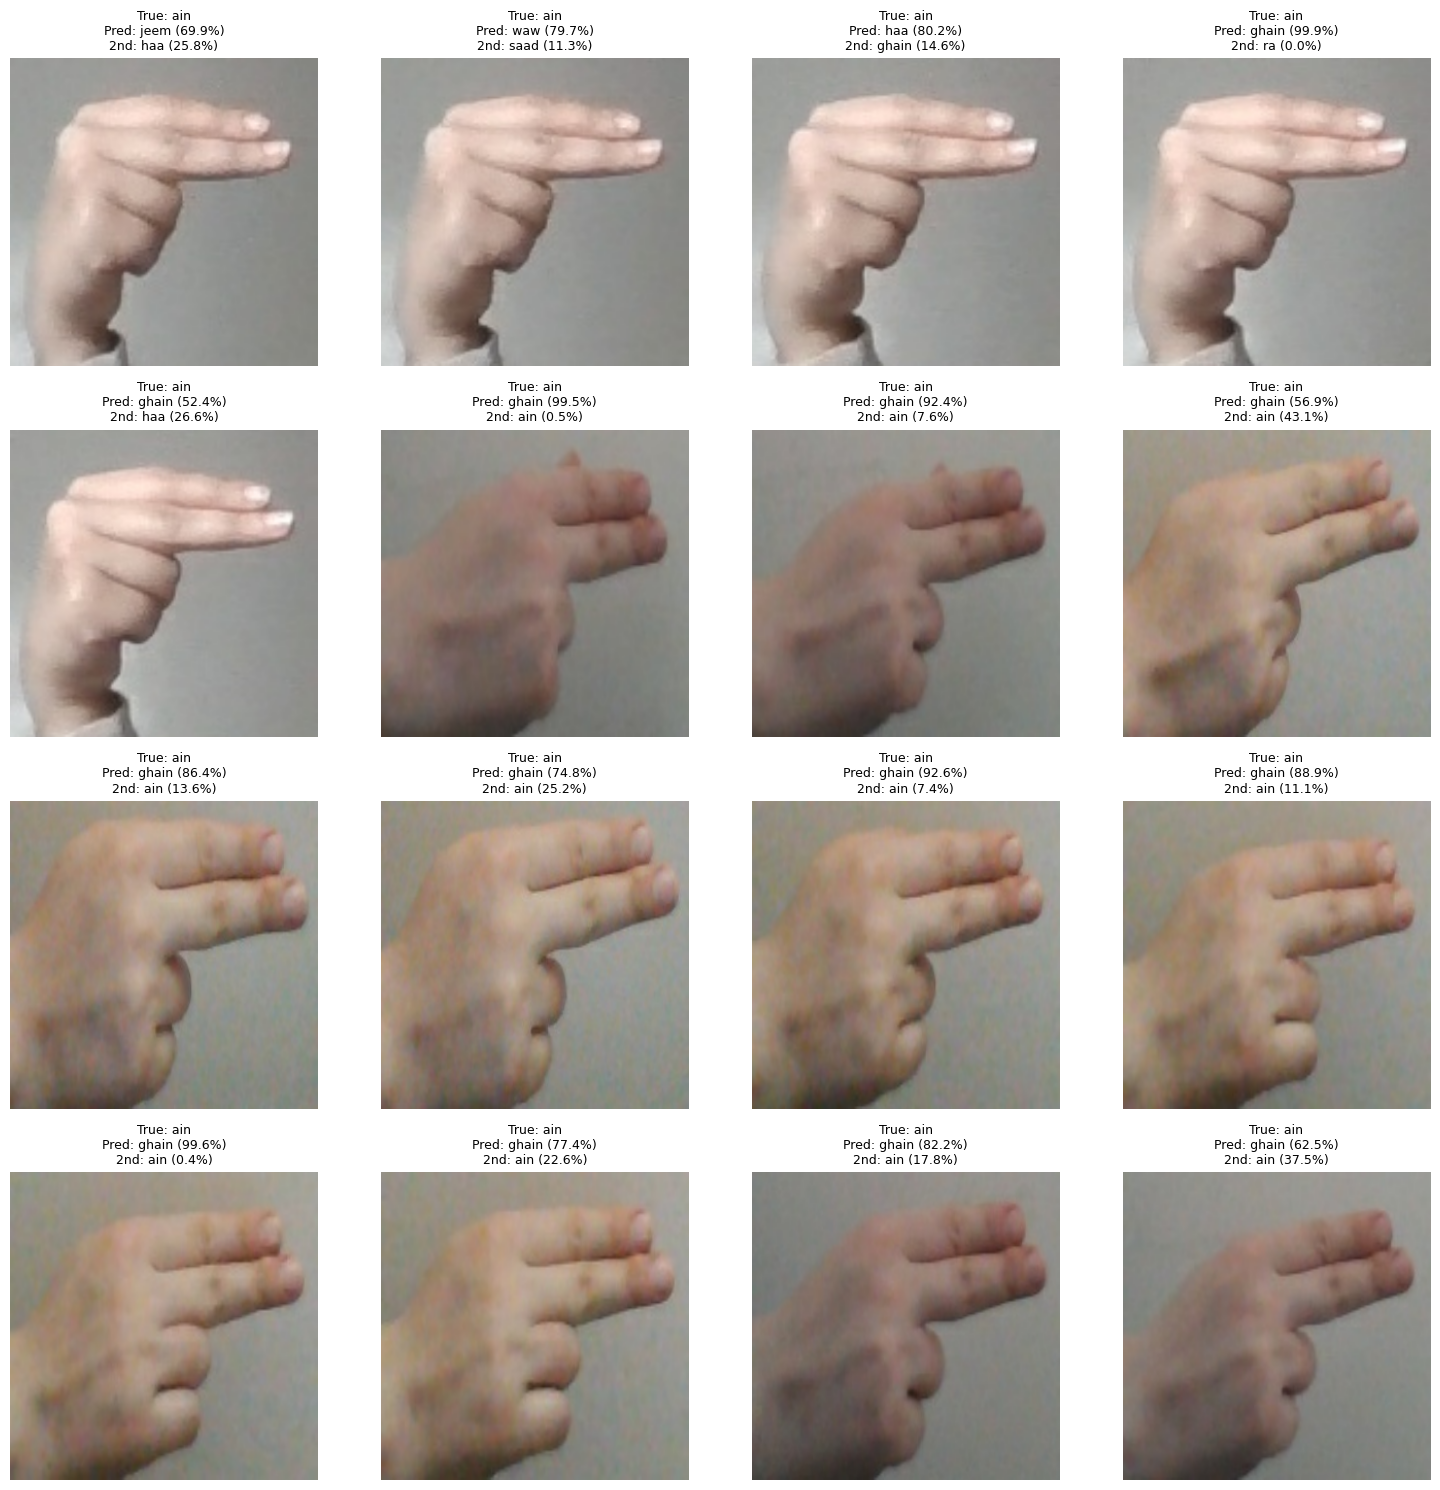

In [27]:
images = []
true_labels = []
for img_batch, label_batch in test_ds:
    images.extend(img_batch.numpy())
    true_labels.extend(label_batch.numpy())
images = np.array(images)
true_labels = np.array(true_labels)

num_images_to_show = 16
plt.figure(figsize=(15, 15))

for i, idx in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[idx].astype("uint8"))

    pred = predict_categories[idx]
    pred_conf = y_pred[idx][pred] * 100

    top2 = np.argsort(y_pred[idx])[-2:]
    second_pred = top2[-2]
    second_conf = y_pred[idx][second_pred] * 100

    plt.title(
        f"True: {class_names[true_labels[idx]]}\n"
        f"Pred: {class_names[pred]} ({pred_conf:.1f}%)\n"
        f"2nd: {class_names[second_pred]} ({second_conf:.1f}%)",
        fontsize=9
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


In [28]:
OPTIMIZER = Adam(learning_rate=1e-6, beta_1=0.9, beta_2=0.999)

for layer in base_model.layers[-40:]:
    layer.trainable = True

model.compile(optimizer=OPTIMIZER, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescale_m1_1 (Rescaling)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop (Dropout)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logits (Dense)                  │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,868,288 (87.24 MB)

 Trainable params: 1,065,504 (4.06 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [29]:
history_stage2 = model.fit(
    train_ds, 
        validation_data=val_ds,
            epochs=8,
                callbacks=get_callbacks("InceptionV3_stage2")
)

Epoch 1/8
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.9178 - loss: 0.4691
Epoch 1: val_accuracy improved from None to 0.98344, saving model to model.InceptionV3_stage2.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2641s 1s/step - accuracy: 0.9214 - loss: 0.4454 - val_accuracy: 0.9834 - val_loss: 0.0738 - learning_rate: 1.0000e-06
Epoch 2/8
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9297 - loss: 0.3863
Epoch 2: val_accuracy improved from 0.98344 to 0.98604, saving model to model.InceptionV3_stage2.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5528s 2s/step - accuracy: 0.9315 - loss: 0.3741 - val_accuracy: 0.9860 - val_loss: 0.0641 - learning_rate: 1.0000e-06
Epoch 3/8
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.9369 - loss: 0.3358
Epoch 3: val_accuracy improved from 0.98604 to 0.98729, saving model to model.InceptionV3_stage2.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1340s 558ms/step - accuracy: 0.9369 - loss: 0.3380 - val_accuracy: 0.9873 - val_loss: 0.0602 - learni

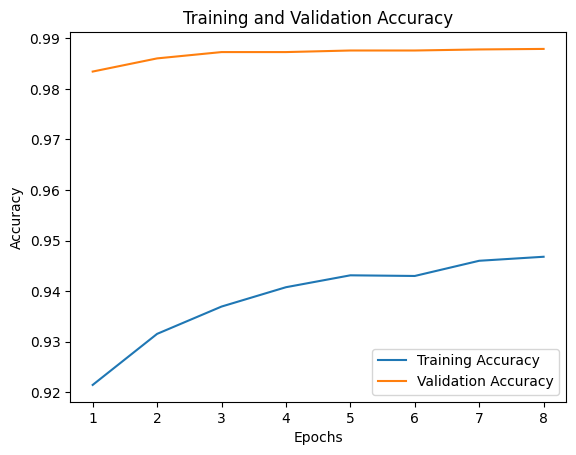

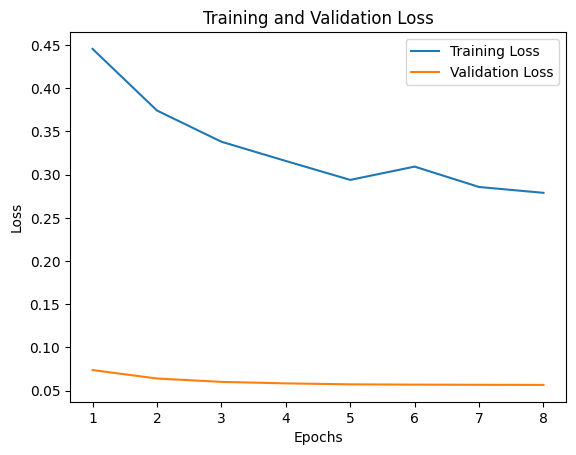

In [30]:
acc=history_stage2.history['accuracy']
val_acc=history_stage2.history['val_accuracy']
loss=history_stage2.history['loss']
val_loss=history_stage2.history['val_loss']
epochs_range=range(1,len(acc)+1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:

model = tf.keras.models.load_model("model.InceptionV3_stage2.keras")

y_pred=model.predict(test_ds)
predict_categories=np.argmax(y_pred, axis=1)
true_categories= y_true
print(classification_report(true_categories, predict_categories, target_names=class_names))


300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 407ms/step
              precision    recall  f1-score   support

         ain       1.00      0.98      0.99       300
          al       1.00      1.00      1.00       300
       aleff       1.00      1.00      1.00       300
          bb       1.00      1.00      1.00       300
         dal       1.00      1.00      1.00       300
         dha       1.00      0.99      0.99       300
        dhad       0.99      0.99      0.99       300
          fa       0.98      0.99      0.99       300
        gaaf       0.98      0.97      0.98       300
       ghain       0.97      1.00      0.99       300
          ha       1.00      1.00      1.00       300
         haa       1.00      0.97      0.98       300
        jeem       0.98      0.99      0.99       300
        kaaf       0.98      0.99      0.99       300
        khaa       0.99      1.00      1.00       300
          la       1.00      1.00      1.00       300
        laam       0.99      0.99   

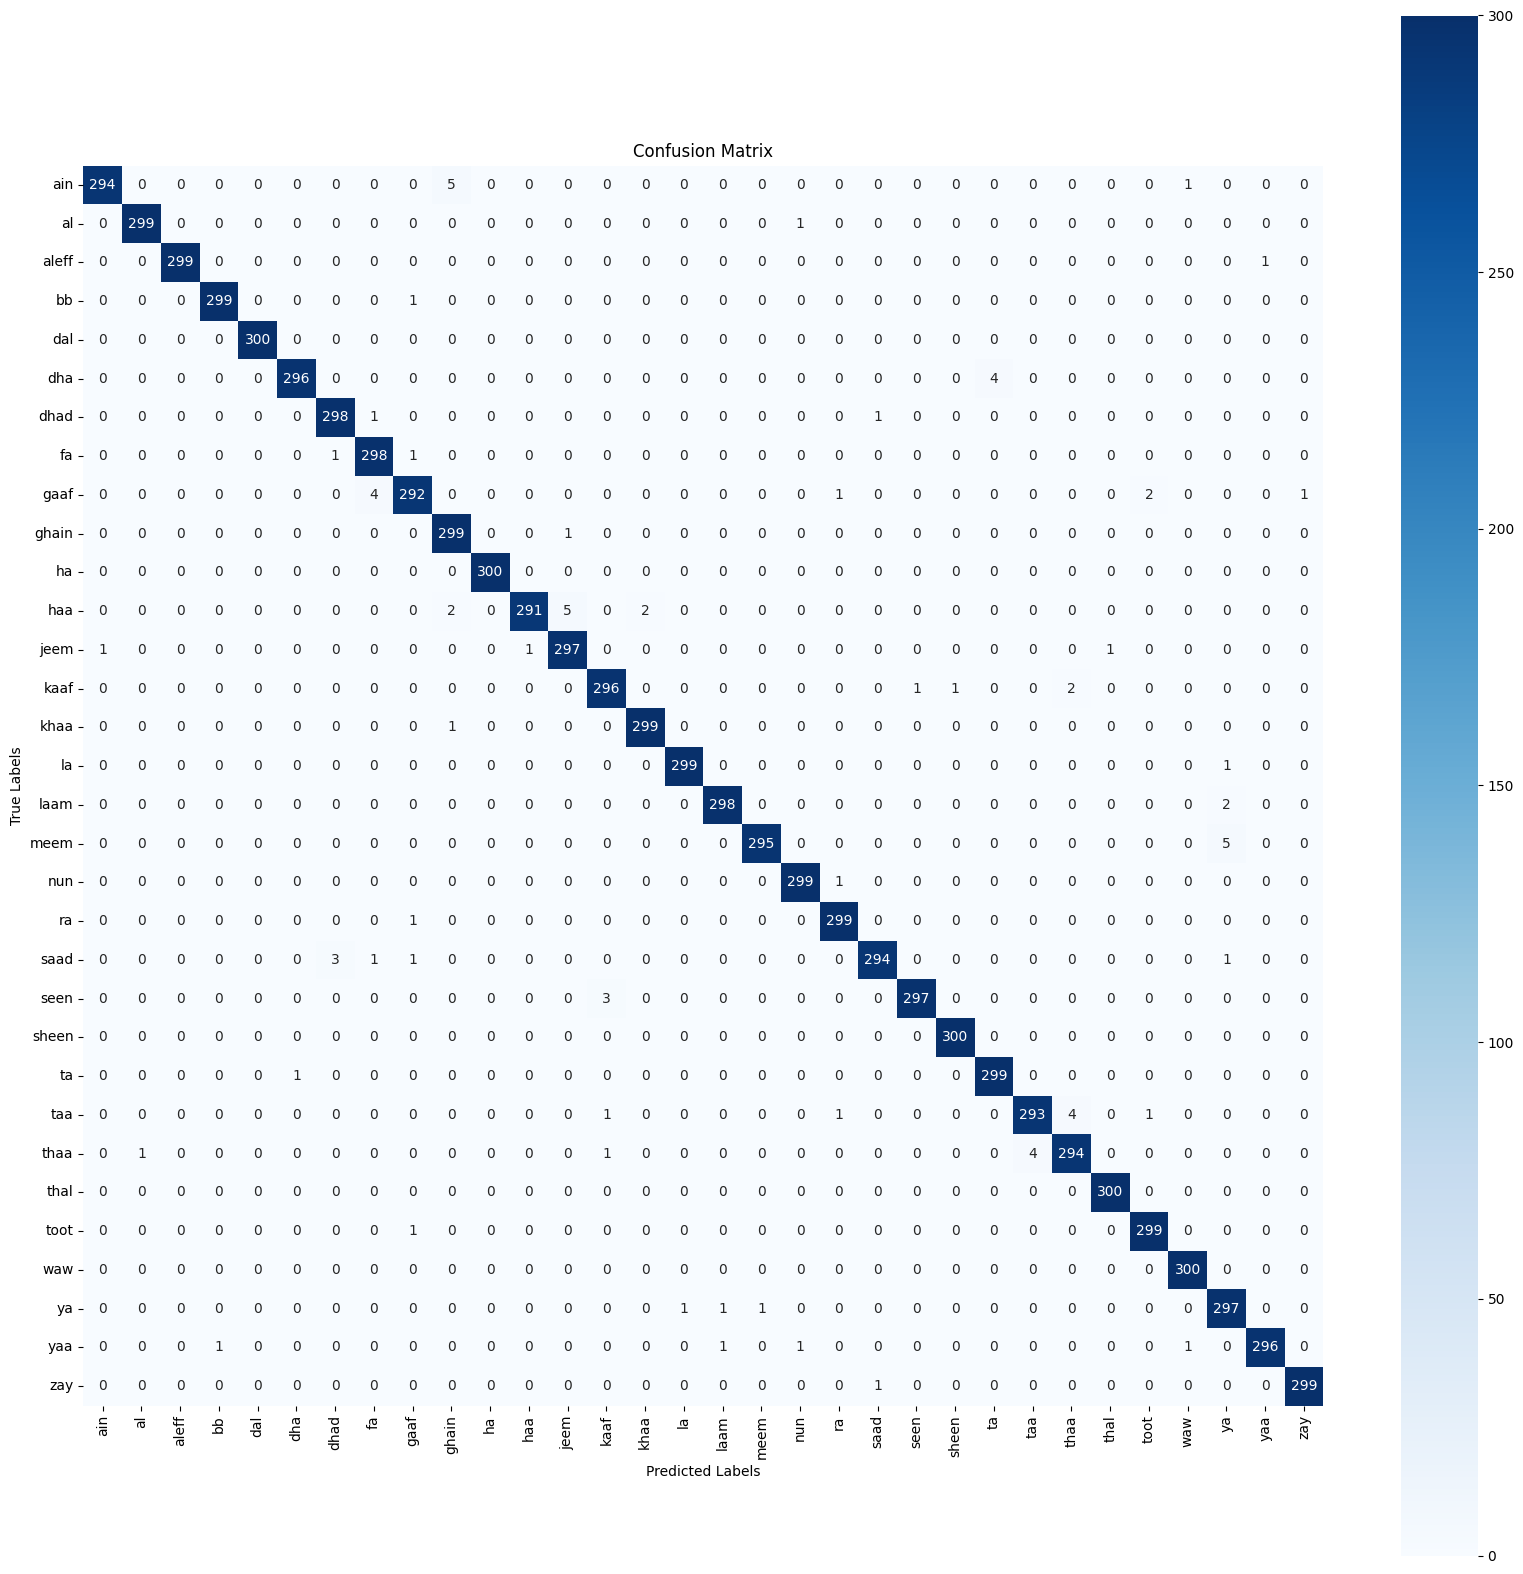

In [32]:
cm=confusion_matrix(y_true, predict_categories, labels=range(len(class_names)))

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,cbar=True,square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 411ms/step


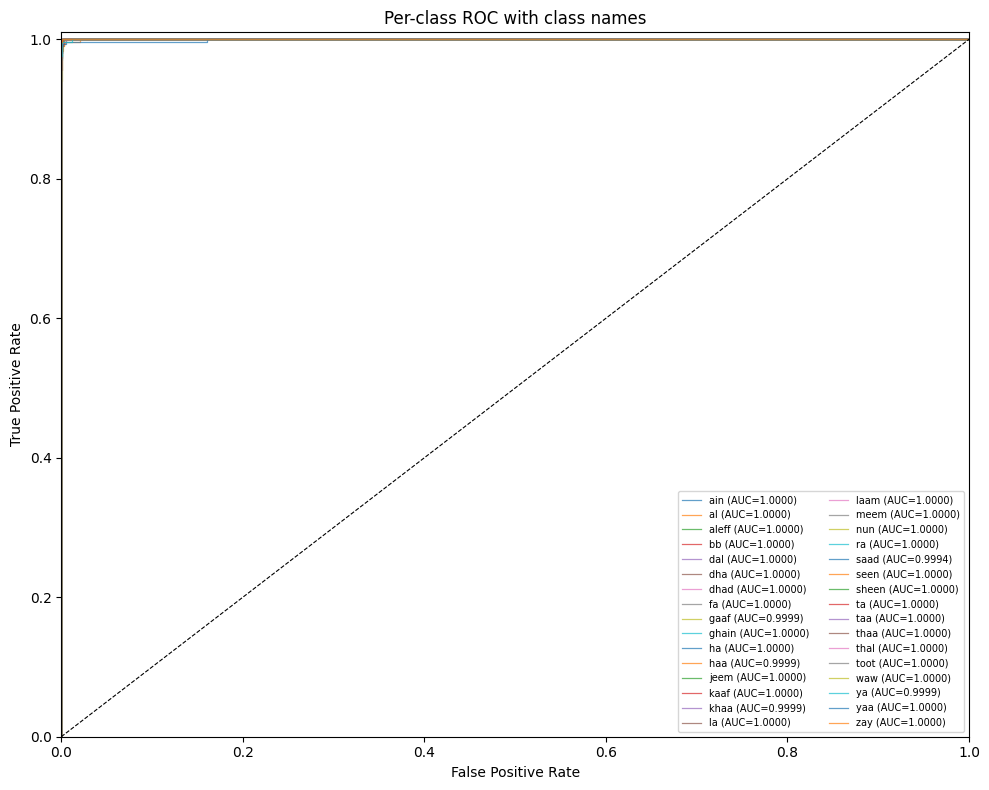

In [33]:

y_score = model.predict(test_ds, verbose=1)           
num_classes = y_score.shape[1]

Y = label_binarize(y_true, classes=np.arange(num_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=0.9, alpha=0.7,
             label=f'{class_names[i]} (AUC={roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlim([0, 1]); plt.ylim([0, 1.01])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Per-class ROC with class names')
plt.legend(loc='lower right', fontsize=7, ncol=2)
plt.tight_layout(); plt.show()


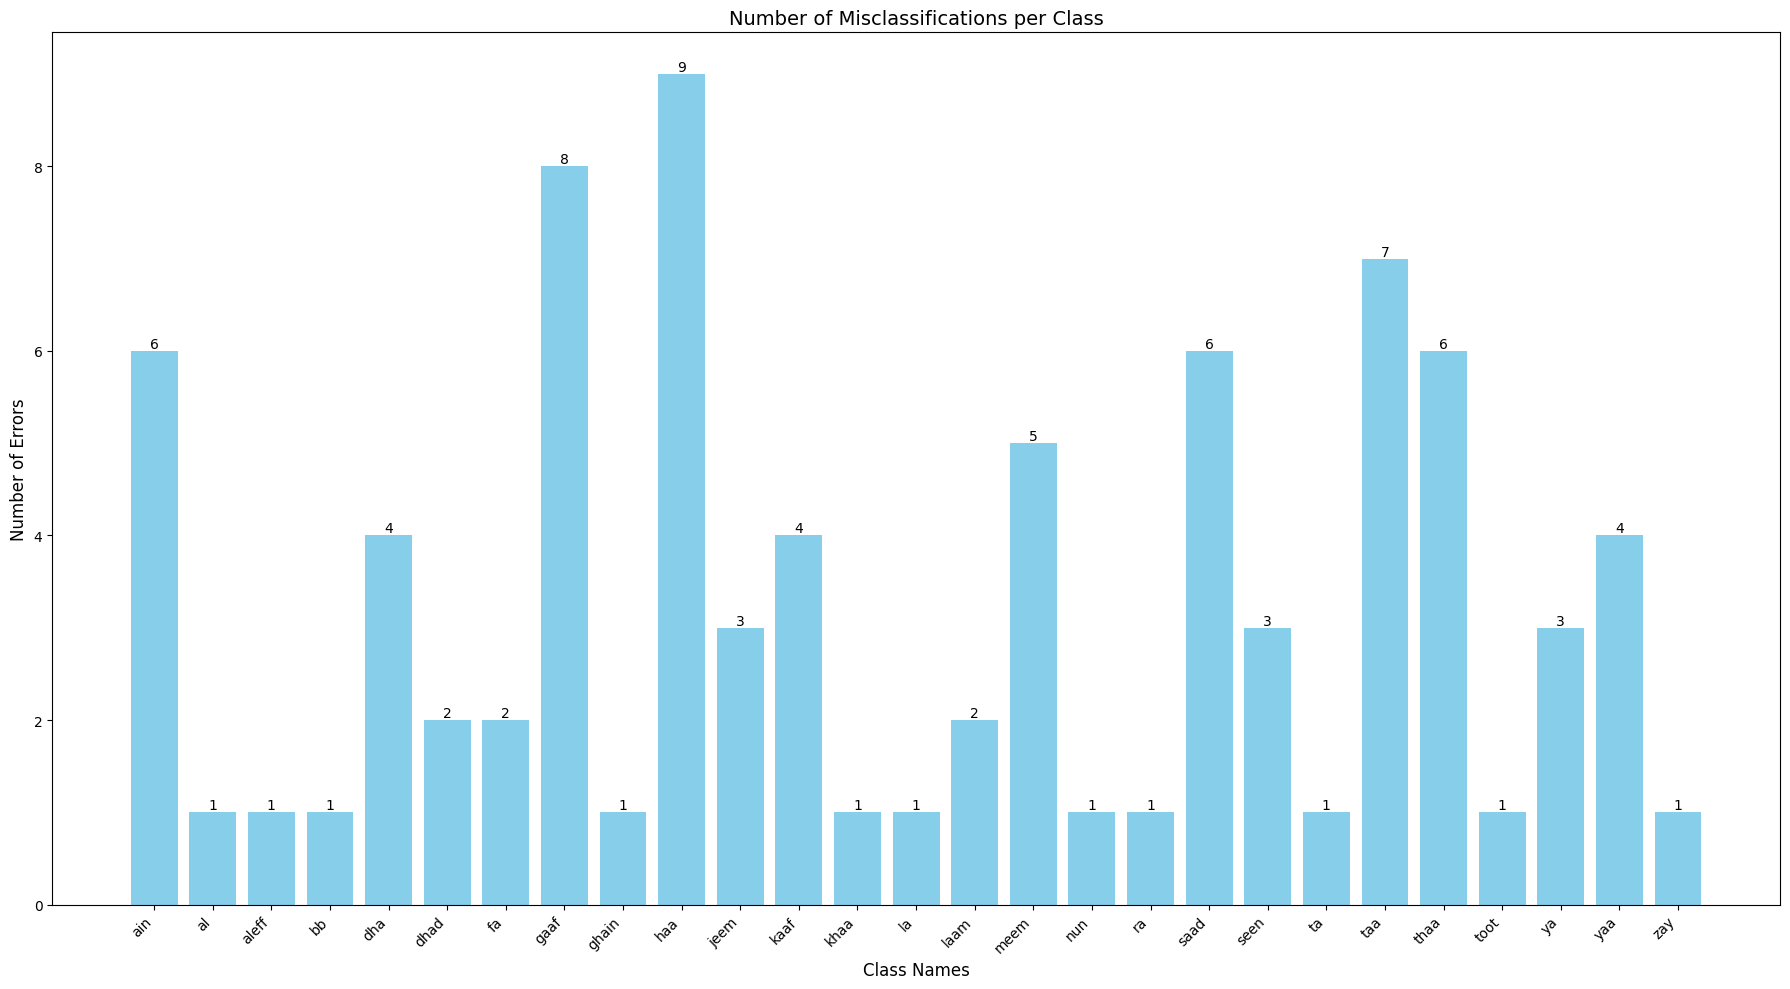

In [34]:

# Identify misclassified samples
misclassified_indices = np.where(true_categories != predict_categories)[0]
misclassified_true = true_categories[misclassified_indices]

# Count the number of misclassifications per class
misclassified_counts = Counter(misclassified_true)

classes = [class_names[cls] for cls in misclassified_counts.keys()]
errors = list(misclassified_counts.values())

plt.figure(figsize=(18, 10))
bars = plt.bar(classes, errors, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Number of Errors', fontsize=12)
plt.title('Number of Misclassifications per Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


2025-09-29 04:02:21.616597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


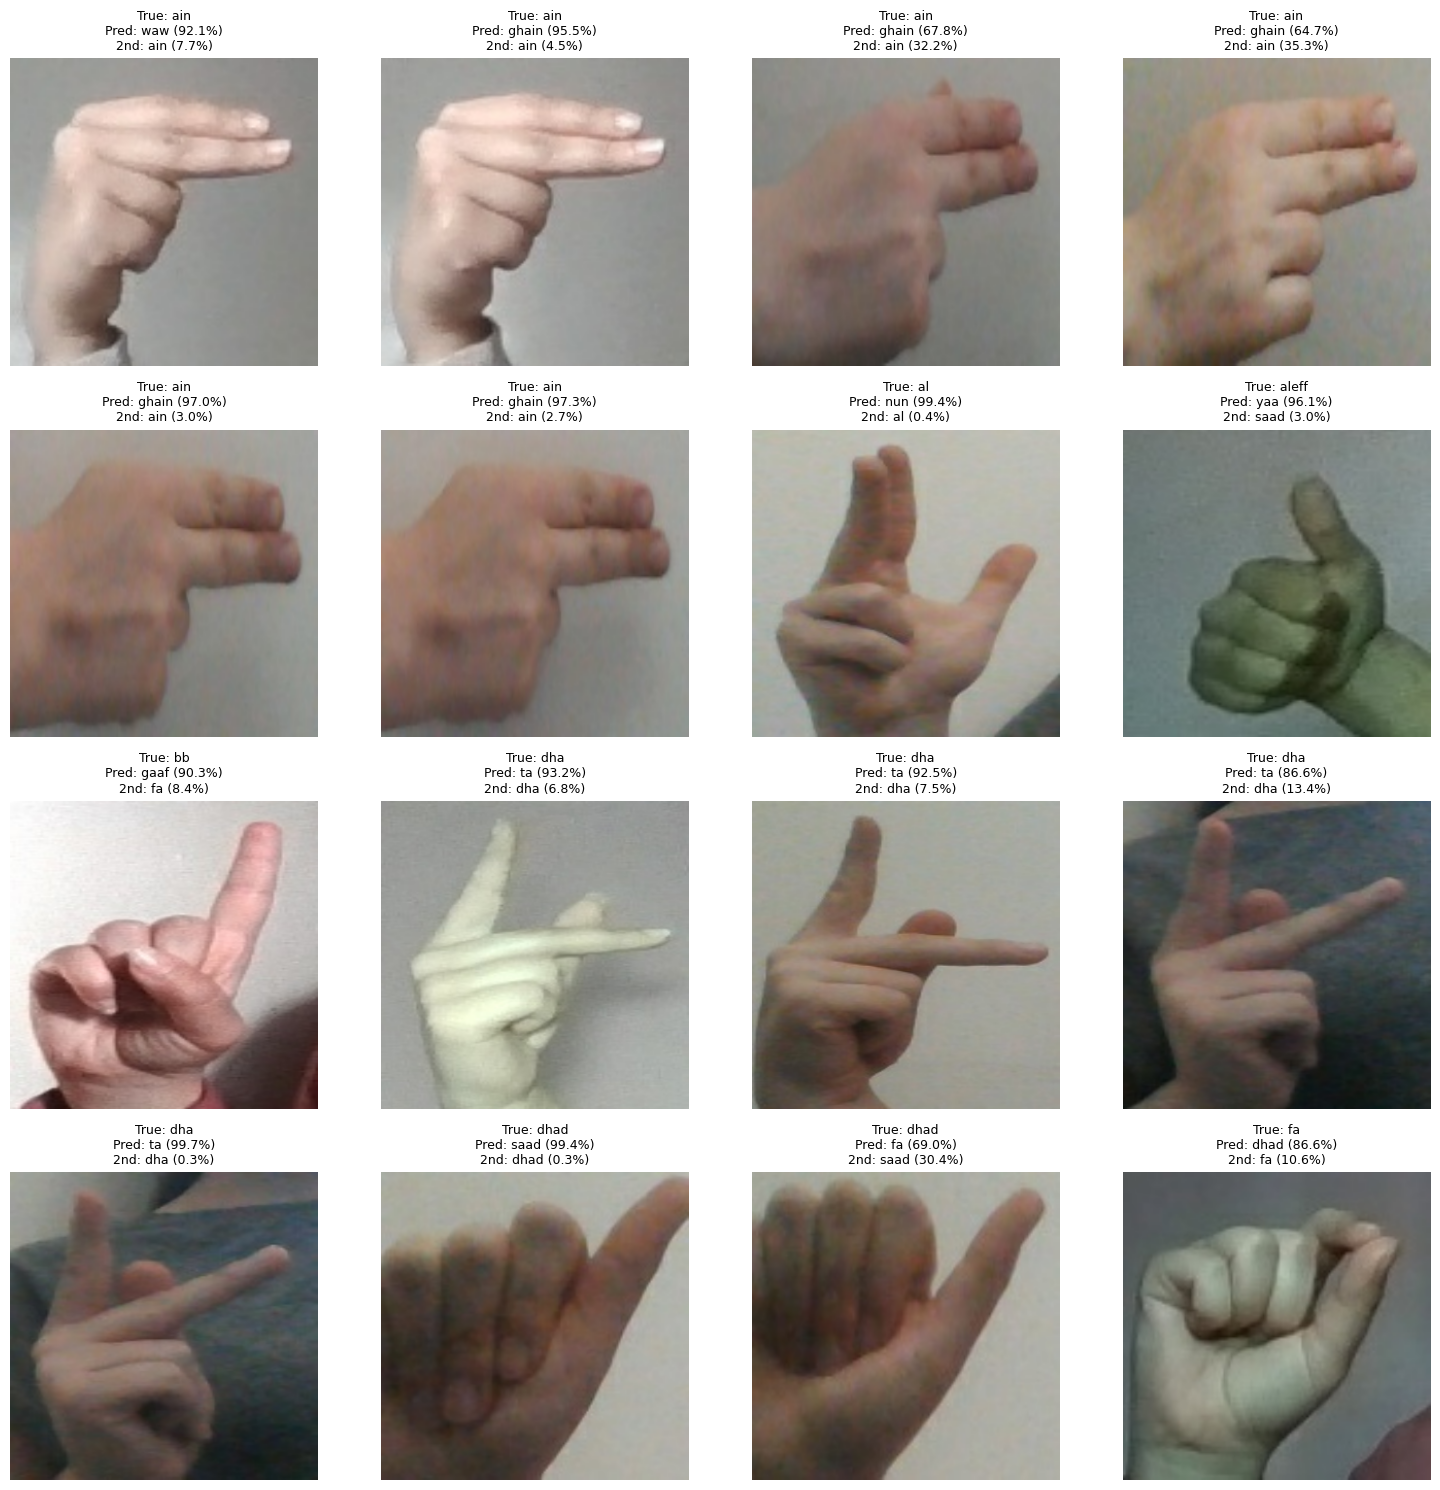

In [35]:
# Extract images from the test dataset
images = []
true_labels = []
for img_batch, label_batch in test_ds:
    images.extend(img_batch.numpy())
    true_labels.extend(label_batch.numpy())
images = np.array(images)
true_labels = np.array(true_labels)

num_images_to_show = 16
plt.figure(figsize=(15, 15))

for i, idx in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[idx].astype("uint8"))

    pred = predict_categories[idx]
    pred_conf = y_pred[idx][pred] * 100

    top2 = np.argsort(y_pred[idx])[-2:]
    second_pred = top2[-2]
    second_conf = y_pred[idx][second_pred] * 100

    plt.title(
        f"True: {class_names[true_labels[idx]]}\n"
        f"Pred: {class_names[pred]} ({pred_conf:.1f}%)\n"
        f"2nd: {class_names[second_pred]} ({second_conf:.1f}%)",
        fontsize=9
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


In [36]:
import joblib
import xgboost as xgb
import os, glob, json, math
LABEL_COL    = "4190"
FILENAME_COL = "4191"

assert LABEL_COL in df_landMarks.columns and FILENAME_COL in df_landMarks.columns, "أعمدة CSV ناقصة."

df = df_landMarks.copy()
df["img_name"] = df[FILENAME_COL].astype(str).str.strip()

feat_cols = [c for c in df.columns if c not in [LABEL_COL, FILENAME_COL, "img_name"]]

landmarks_map = {}
for _, r in df.iterrows():
    landmarks_map[r["img_name"]] = (r[feat_cols].to_numpy(dtype="float32"), int(r[LABEL_COL]))

num_classes = len(class_names)
print(f"landmarks_map size: {len(landmarks_map)} | num_classes: {num_classes}")

landmarks_map size: 96000 | num_classes: 32


In [37]:
IMG_H, IMG_W = 299, 299

def make_paths(split):
    patt = [
        os.path.join("data_splitted", split, "*", "*.jpg"),
        os.path.join("data_splitted", split, "*", "*.jpeg"),
        os.path.join("data_splitted", split, "*", "*.png"),
        os.path.join("data_splitted", split, "*", "*.JPG"),
        os.path.join("data_splitted", split, "*", "*.PNG"),
    ]
    files = []
    for p in patt:
        files.extend(glob.glob(p))
    files = sorted(set(files))
    print(f"{split} (raw) files:", len(files))
    return files

def filter_paths_with_landmarks(paths, landmarks_map):
    keep = []
    miss = []
    for p in paths:
        fname = os.path.basename(p)
        if fname in landmarks_map:
            keep.append(p)
        else:
            miss.append(fname)
    if miss:
        print(f"[WARN:{len(miss)}] paths missing landmarks. (showing 5) ->", miss[:5])
    print(f"kept {len(keep)} / {len(paths)} after landmarks filter.")
    return keep

train_paths_raw = make_paths("train")
val_paths_raw   = make_paths("val")
test_paths_raw  = make_paths("test")

train_paths = filter_paths_with_landmarks(train_paths_raw, landmarks_map)
val_paths   = filter_paths_with_landmarks(val_paths_raw,   landmarks_map)
test_paths  = filter_paths_with_landmarks(test_paths_raw,  landmarks_map)

train (raw) files: 76800
val (raw) files: 9600
test (raw) files: 9600
kept 76800 / 76800 after landmarks filter.
kept 9600 / 9600 after landmarks filter.
kept 9600 / 9600 after landmarks filter.


In [38]:
AUTOTUNE = tf.data.AUTOTUNE

def decode_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, [IMG_H, IMG_W])
    img = tf.cast(img, tf.float32) 
    return img

def build_ds_from_paths(paths, batch=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    if shuffle:
        ds = ds.shuffle(buffer_size=min(8192, len(paths)))
    ds = ds.map(lambda p: decode_and_preprocess(p), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch).prefetch(AUTOTUNE)
    return ds

def collect_lmk_in_order(paths, landmarks_map):
    X_lmk, y = [], []
    for p in paths:
        fname = os.path.basename(p)
        feats, lab = landmarks_map[fname]
        X_lmk.append(feats)
        y.append(lab)
    return np.asarray(X_lmk, dtype="float32"), np.asarray(y, dtype="int32")

train_ds_x = build_ds_from_paths(train_paths, batch=32, shuffle=False)
val_ds_x   = build_ds_from_paths(val_paths,   batch=32)
test_ds_x  = build_ds_from_paths(test_paths,  batch=32)

X_train_lmk, y_train_xgb = collect_lmk_in_order(train_paths, landmarks_map)
X_val_lmk,   y_val_xgb   = collect_lmk_in_order(val_paths,   landmarks_map)
X_test_lmk,  y_test_xgb  = collect_lmk_in_order(test_paths,  landmarks_map)

print("Landmarks shapes:", X_train_lmk.shape, X_val_lmk.shape, X_test_lmk.shape)
print("Labels shapes   :", y_train_xgb.shape,  y_val_xgb.shape,  y_test_xgb.shape)

Landmarks shapes: (76800, 89) (9600, 89) (9600, 89)
Labels shapes   : (76800,) (9600,) (9600,)


In [39]:
gap_layer = model.get_layer("gap")  
feature_extractor = Model(inputs=model.input, outputs=gap_layer.output)

X_train_cnn = feature_extractor.predict(train_ds_x, verbose=1)
X_val_cnn   = feature_extractor.predict(val_ds_x,   verbose=1)
X_test_cnn  = feature_extractor.predict(test_ds_x,  verbose=1)

print("CNN feature shapes:", X_train_cnn.shape, X_val_cnn.shape, X_test_cnn.shape)

assert X_train_cnn.shape[0] == X_train_lmk.shape[0] == y_train_xgb.shape[0]
assert X_val_cnn.shape[0]   == X_val_lmk.shape[0]   == y_val_xgb.shape[0]
assert X_test_cnn.shape[0]  == X_test_lmk.shape[0]  == y_test_xgb.shape[0]

2400/2400 ━━━━━━━━━━━━━━━━━━━━ 999s 413ms/step
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 432ms/step
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 421ms/step
CNN feature shapes: (76800, 2048) (9600, 2048) (9600, 2048)


In [40]:
scaler_lmk = StandardScaler()
X_train_lmk_sc = scaler_lmk.fit_transform(X_train_lmk).astype("float32")
X_val_lmk_sc   = scaler_lmk.transform(X_val_lmk).astype("float32")
X_test_lmk_sc  = scaler_lmk.transform(X_test_lmk).astype("float32")

os.makedirs("features_hybrid", exist_ok=True)
joblib.dump(scaler_lmk, "features_hybrid/scaler_lmk.pkl")
print("[OK] saved scaler -> features_hybrid/scaler_lmk.pkl")

with open("features_hybrid/class_names.json", "w") as f:
    json.dump(class_names, f)
print("[OK] saved class_names.json")

[OK] saved scaler -> features_hybrid/scaler_lmk.pkl
[OK] saved class_names.json


In [41]:
X_train_comb = np.concatenate([X_train_cnn, X_train_lmk_sc], axis=1)
X_val_comb   = np.concatenate([X_val_cnn,   X_val_lmk_sc],   axis=1)
X_test_comb  = np.concatenate([X_test_cnn,  X_test_lmk_sc],  axis=1)

print("Combined shapes:", X_train_comb.shape, X_val_comb.shape, X_test_comb.shape)
assert X_train_comb.shape[1] == 2137

xgb_params = dict(
    objective='multi:softprob',
    num_class=num_classes,
    learning_rate=0.05,
    max_depth=7,
    n_estimators=800,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.5,
    reg_alpha=0.5,
    gamma=0.0,
    tree_method='hist',
    eval_metric='mlogloss',
    verbosity=1,
    n_jobs=-1
)

xgb_model = xgb.XGBClassifier(**xgb_params)

xgb_model.fit(X_train_comb, y_train_xgb)

xgb_model.save_model("xgb_cnn_plus_landmarks.json")
print("[OK] saved XGB -> xgb_cnn_plus_landmarks.json")




Combined shapes: (76800, 2137) (9600, 2137) (9600, 2137)
[OK] saved XGB -> xgb_cnn_plus_landmarks.json


In [42]:
y_pred_test      = xgb_model.predict(X_test_comb)
y_pred_test_prob = xgb_model.predict_proba(X_test_comb)

print("\n=== XGBoost (CNN + Landmarks) — Classification Report (TEST) ===")
print(classification_report(y_test_xgb, y_pred_test, target_names=class_names, digits=4))



=== XGBoost (CNN + Landmarks) — Classification Report (TEST) ===
              precision    recall  f1-score   support

         ain     1.0000    1.0000    1.0000       300
          al     1.0000    1.0000    1.0000       300
       aleff     1.0000    1.0000    1.0000       300
          bb     1.0000    1.0000    1.0000       300
         dal     1.0000    1.0000    1.0000       300
         dha     1.0000    0.9967    0.9983       300
        dhad     1.0000    1.0000    1.0000       300
          fa     1.0000    1.0000    1.0000       300
        gaaf     1.0000    1.0000    1.0000       300
       ghain     1.0000    1.0000    1.0000       300
          ha     0.9967    1.0000    0.9983       300
         haa     1.0000    1.0000    1.0000       300
        jeem     0.9967    1.0000    0.9983       300
        kaaf     0.9967    1.0000    0.9983       300
        khaa     1.0000    1.0000    1.0000       300
          la     1.0000    1.0000    1.0000       300
        laam   

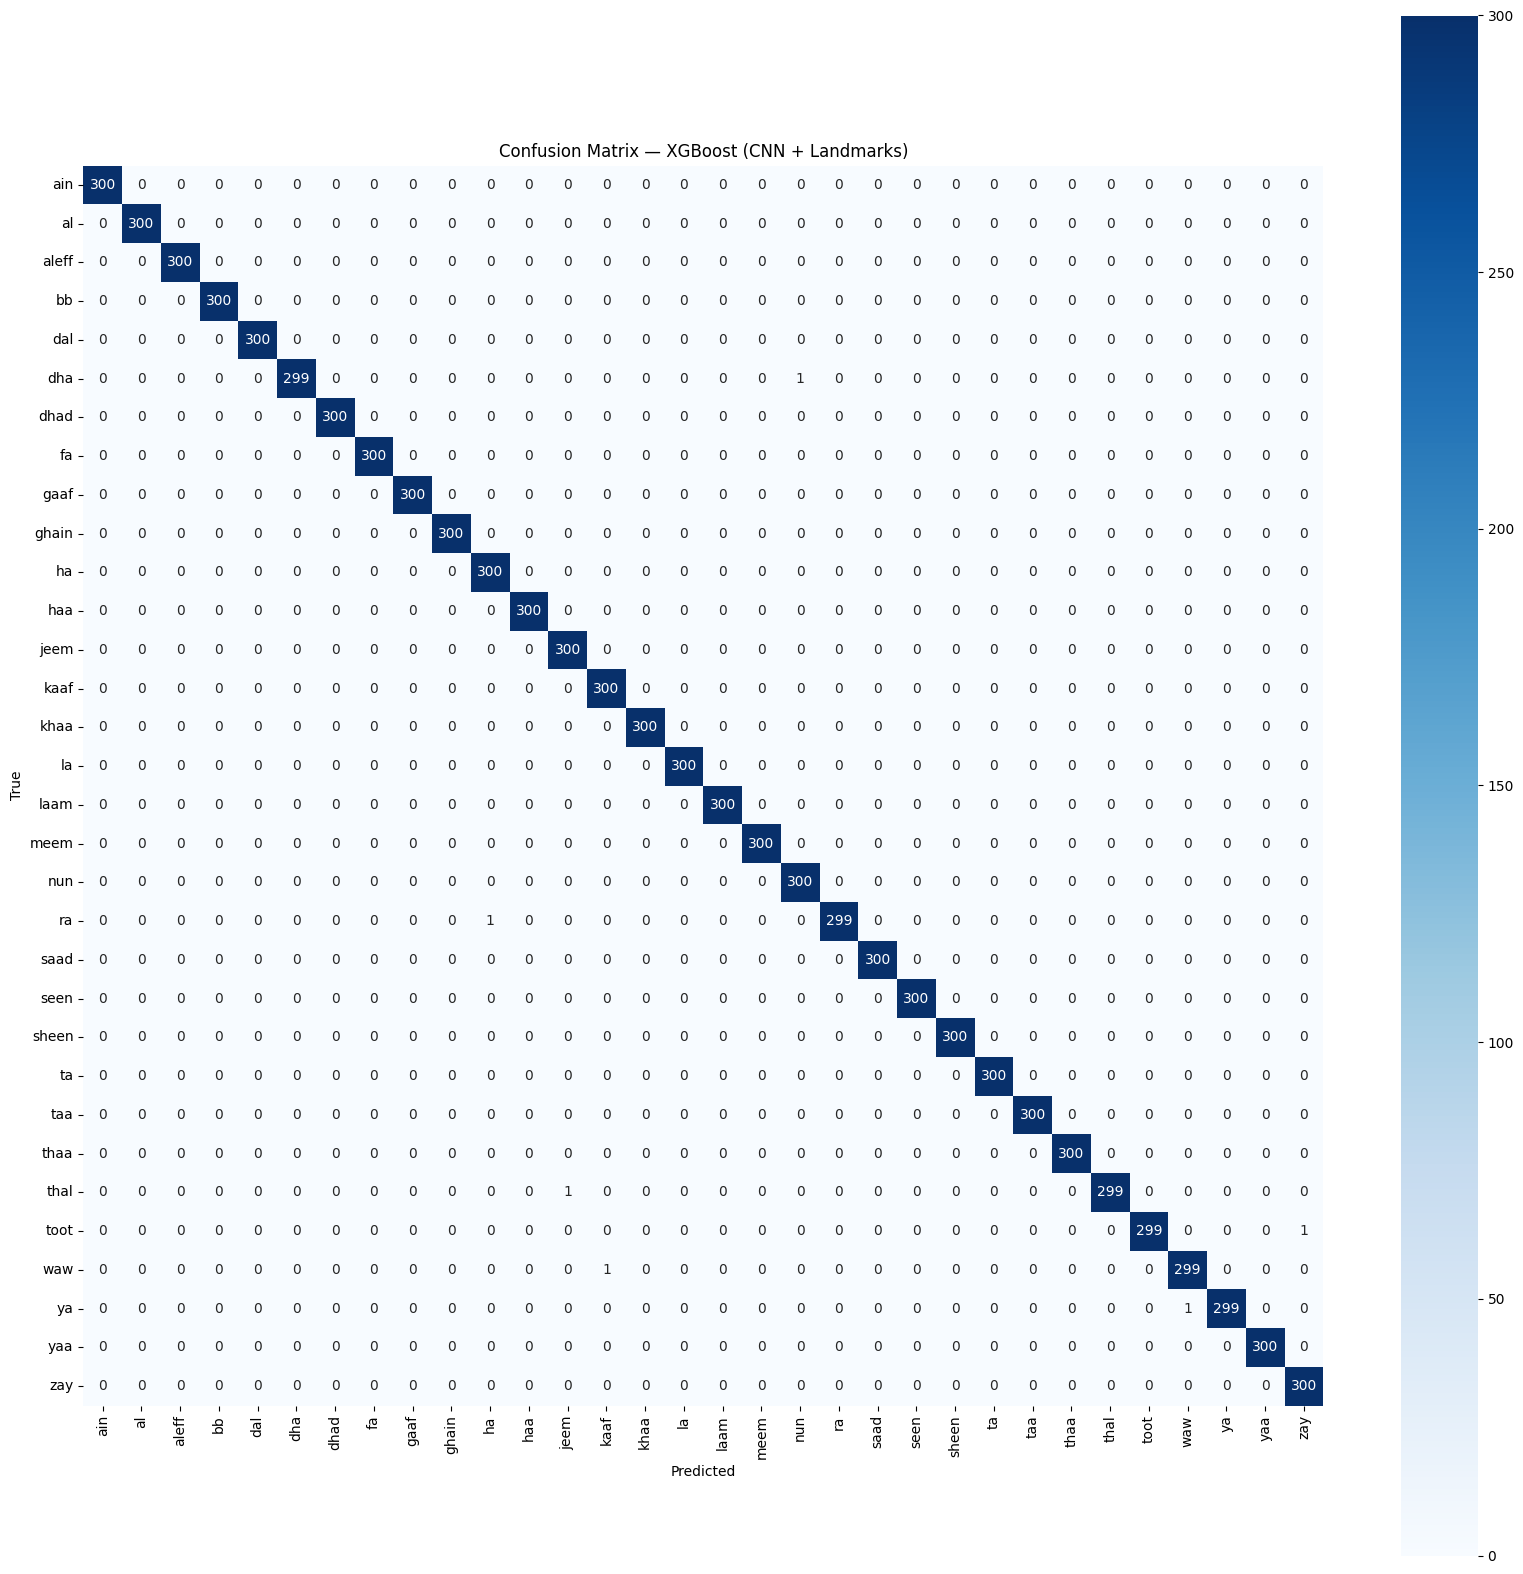

In [43]:

cm = confusion_matrix(y_test_xgb, y_pred_test, labels=range(num_classes))
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, square=True)
plt.xlabel('Predicted'); plt.ylabel('True')
plt.title('Confusion Matrix — XGBoost (CNN + Landmarks)')
plt.show()



In [44]:

try:
    Y_test_bin = label_binarize(y_test_xgb, classes=np.arange(num_classes))
    roc_micro = roc_auc_score(Y_test_bin, y_pred_test_prob, average='micro', multi_class='ovr')
    roc_macro = roc_auc_score(Y_test_bin, y_pred_test_prob, average='macro', multi_class='ovr')
    print({"roc_auc_micro": roc_micro, "roc_auc_macro": roc_macro})
except Exception:
    pass

{'roc_auc_micro': 0.9999994140624999, 'roc_auc_macro': 0.9999994399641576}


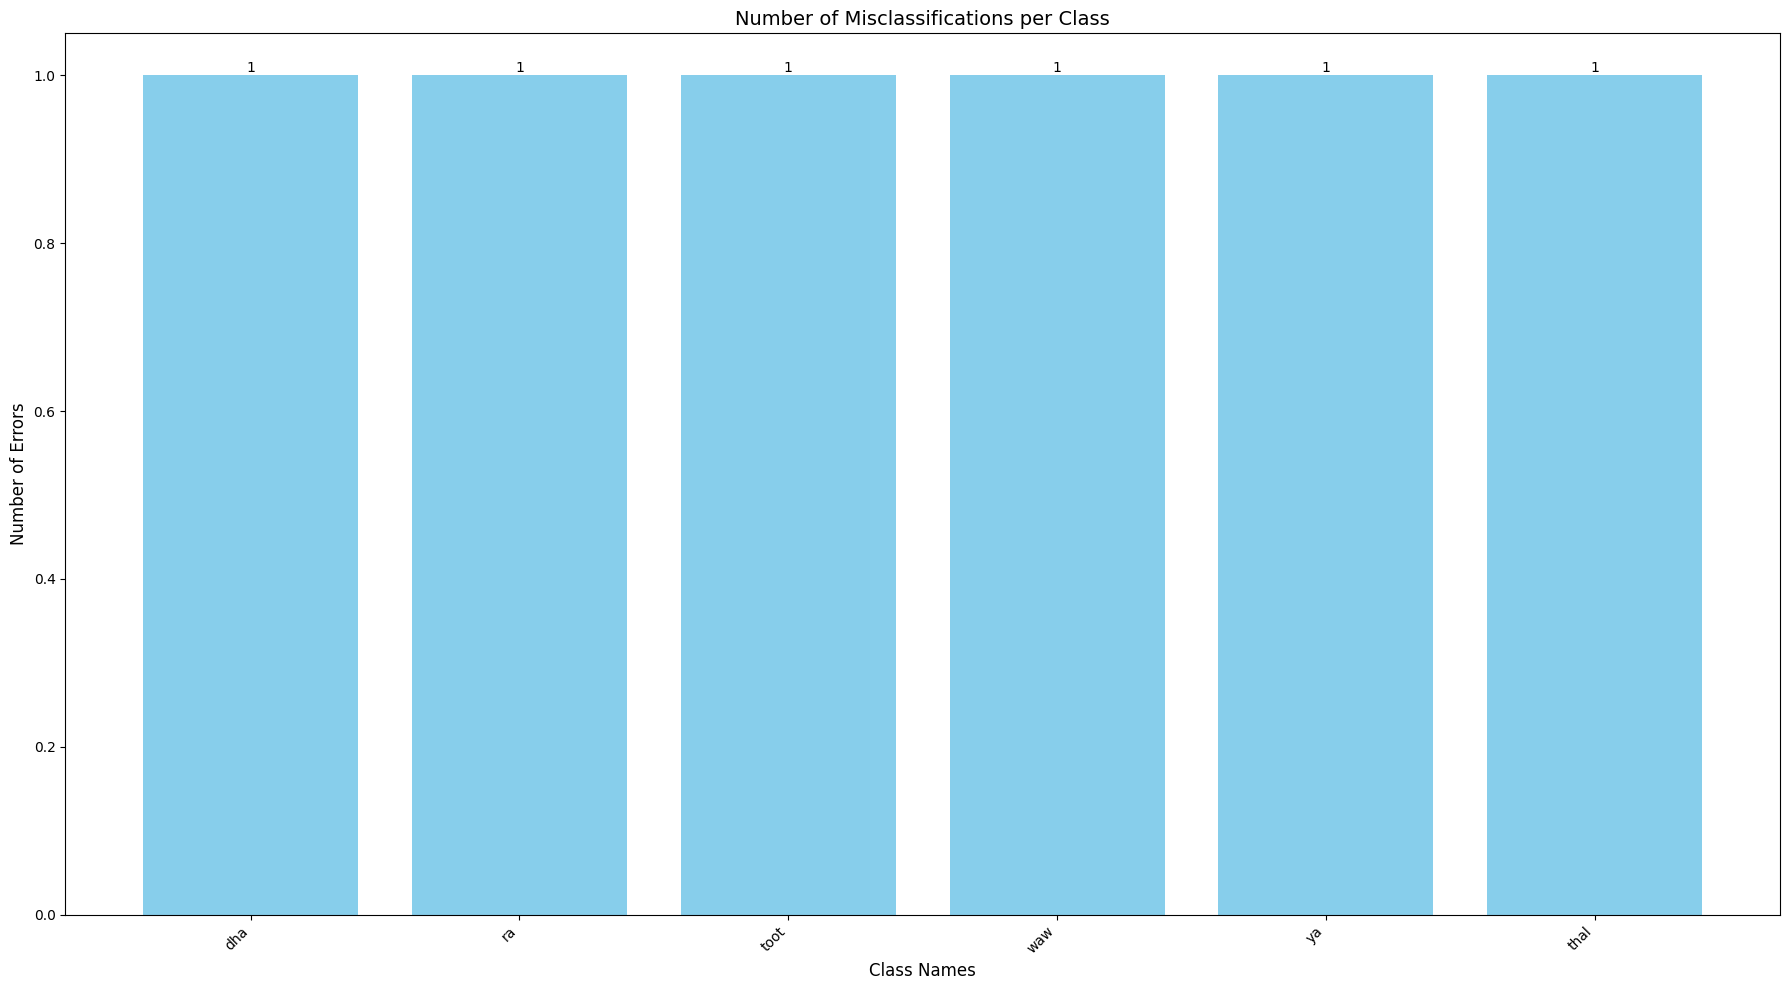

In [46]:
#طباعه الاعمده اللي فيها خطأ وكم مره اخطأت
misclassified_indices = np.where(y_test_xgb != y_pred_test)[0]
misclassified_true = y_test_xgb[misclassified_indices]
misclassified_counts = Counter(misclassified_true)
classes = [class_names[i] for i in misclassified_counts.keys()]
errors = list(misclassified_counts.values())
plt.figure(figsize=(18, 10))
bars = plt.bar(classes, errors, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Number of Errors', fontsize=12)
plt.title('Number of Misclassifications per Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

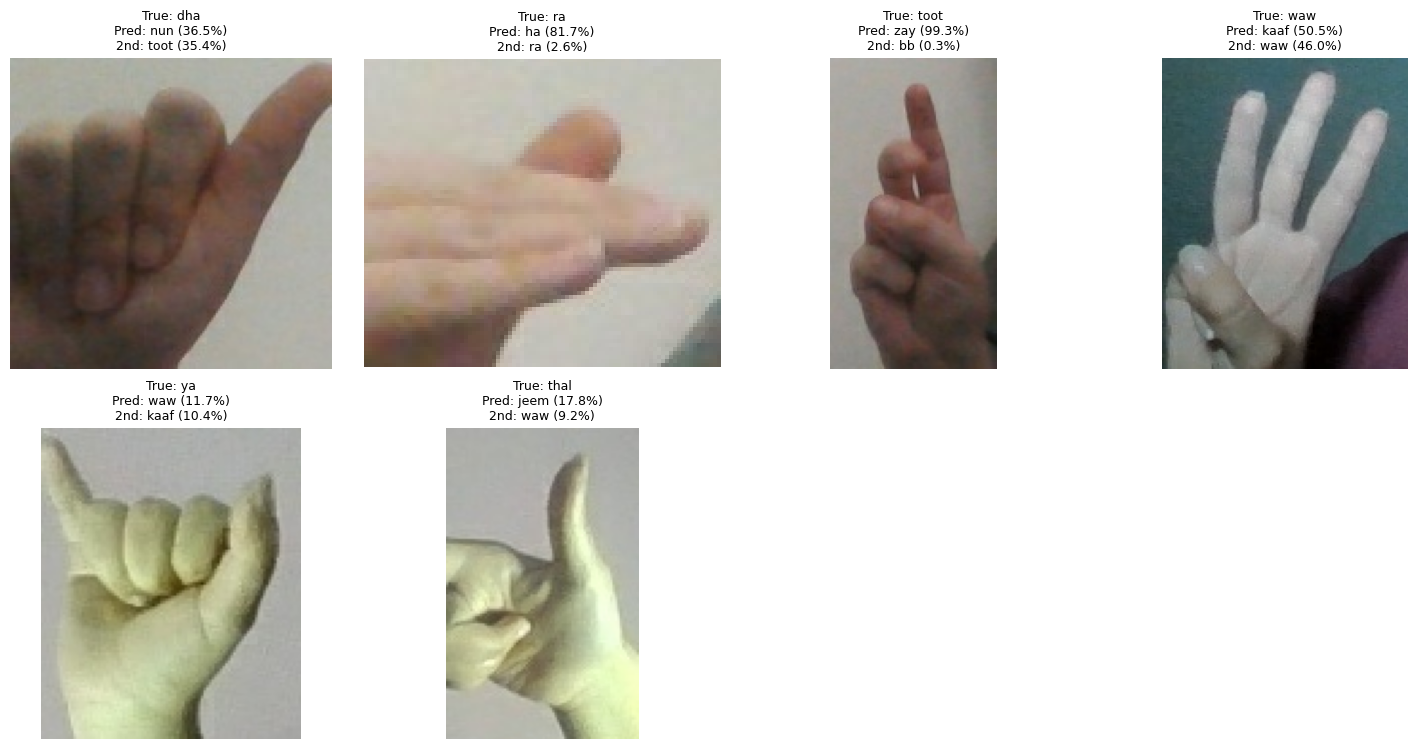

In [50]:
# بدّل مقطع "عرض الصور اللي اخطأت فيها" بهذا:
num_images_to_show = 6
plt.figure(figsize=(15, 15))
for i, idx in enumerate(misclassified_indices[:num_images_to_show]):
    p = test_paths[idx]
    img = tf.io.decode_image(tf.io.read_file(p), channels=3)
    plt.subplot(4, 4, i+1)
    plt.imshow(img.numpy().astype("uint8"))
    pred = y_pred_test[idx]; pred_conf = y_pred_test_prob[idx][pred]*100
    top2 = np.argsort(y_pred_test_prob[idx])[-2:]; second_pred = top2[-2]
    second_conf = y_pred_test_prob[idx][second_pred]*100
    plt.title(
        f"True: {class_names[y_test_xgb[idx]]}\n"
        f"Pred: {class_names[pred]} ({pred_conf:.1f}%)\n"
        f"2nd: {class_names[second_pred]} ({second_conf:.1f}%)",
        fontsize=9
    )
    plt.axis("off")
plt.tight_layout(); plt.show()